In [87]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR 
from docx import Document
from docx.shared import Inches
from sklearn.metrics import r2_score

In [88]:
df_train = pd.read_csv(r"C:\Users\pauli\Downloads\home-data-for-ml-course\train.csv")
df_test = pd.read_csv(r"C:\Users\pauli\Downloads\home-data-for-ml-course\test.csv")
df_submission = pd.read_csv(r"C:\Users\pauli\Downloads\home-data-for-ml-course\sample_submission.csv")

In [89]:
df_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [90]:
df_train.drop(columns=['LotFrontage', 'Alley', 'MasVnrType', 'BsmtCond', 'BsmtExposure', 'GarageCond',
                       'BsmtFinType1', 'BsmtFinType2', 'GarageYrBlt', 'GarageQual', 'Utilities',  
                       'PoolQC', 'MiscFeature', 'BsmtFullBath', 'Functional', 'Id'], inplace= True)
df_test.drop(columns=['LotFrontage', 'Alley', 'MasVnrType', 'BsmtCond', 'BsmtExposure', 'GarageCond',
                      'BsmtFinType1', 'BsmtFinType2', 'GarageYrBlt', 'GarageQual', 'Utilities',
                      'PoolQC', 'MiscFeature', 'BsmtFullBath', 'Functional', 'Id'], inplace= True)

df_test['MSZoning']=df_test['MSZoning'].fillna('RL')

df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(0)

df_train['Electrical']=df_train['Electrical'].fillna('SBrkr')

df_train['FireplaceQu']=df_train['FireplaceQu'].fillna('nera')
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna('nera')

df_train['GarageType']=df_train['GarageType'].fillna('nera')
df_test['GarageType']=df_test['GarageType'].fillna('nera')

df_train['GarageFinish']=df_train['GarageFinish'].fillna('nera')
df_test['GarageFinish']=df_test['GarageFinish'].fillna('nera')

df_train['Fence']=df_train['Fence'].fillna('nera')
df_test['Fence']=df_test['Fence'].fillna('nera')

df_train['BsmtQual']=df_train['BsmtQual'].fillna('nera')
df_test['BsmtQual']=df_test['BsmtQual'].fillna('nera')

df_test['Exterior1st']=df_test['Exterior1st'].fillna('VinylSd')
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna('VinylSd')
df_test['SaleType']=df_test['SaleType'].fillna('WD')
df_test['KitchenQual']=df_test['KitchenQual'].fillna('TA')

df_test=df_test.fillna(0)

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [92]:
columns_to_encode = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [93]:
label_encoder = LabelEncoder()

for column in columns_to_encode:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.transform(df_test[column])

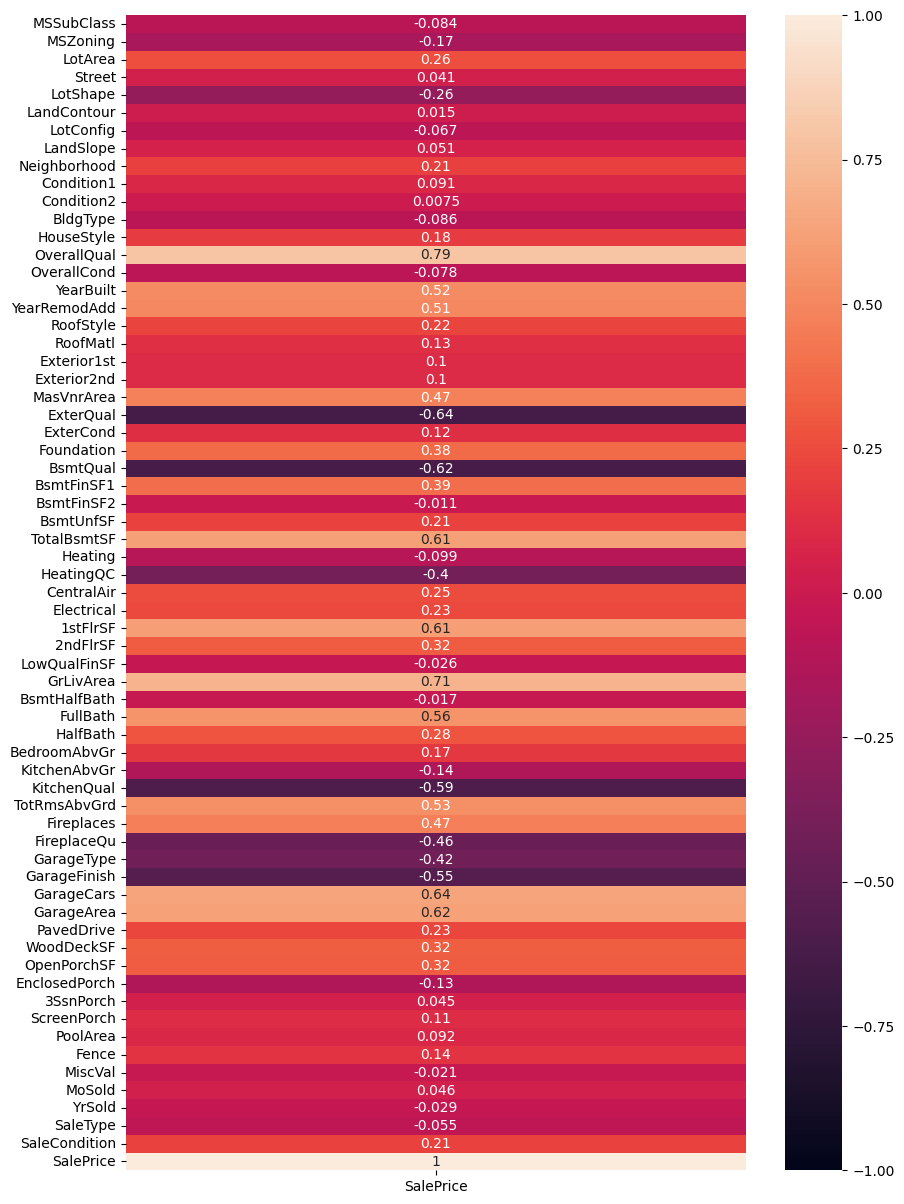

In [94]:
plt.figure(figsize=(10, 15))
sns.heatmap(data=df_train.corr()['SalePrice'].to_frame(), vmin=-1, vmax=1, annot=True)

plt.show()

In [95]:
# corr_with_saleprice = df_train.corr()['SalePrice'].to_frame()

# cols_to_drop = corr_with_saleprice[abs(corr_with_saleprice['SalePrice']) < 0.1].index

# df_train = df_train.drop(columns=cols_to_drop)
# df_test = df_test.drop(columns=cols_to_drop)


In [96]:
X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

score = r2_score(y_test, y_pred)

print(f"R² score: {score:.2f}")
y_pred = regressor.predict(df_test)

R² score: 0.82


In [101]:
X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=25)

regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

score = r2_score(y_test, y_pred)

print(f"R² score: {score:.2f}")

y_pred = regressor.predict(df_test)

R² score: 0.83


In [102]:
df_submission['SalePrice'] = y_pred

df_submission.to_csv("submissionnamai.csv", index=False)

df_submission.head()

,Id,SalePrice
0,1461,127376.50
1,1462,152861.87
2,1463,178370.82
3,1464,182521.00
4,1465,207240.12
